# Homework #2

In [18]:
import numpy as np
from scipy import stats as stat
import matplotlib.pyplot as plt
import statistics as stats

## 1)
Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

In [19]:
p_11 = (1/6)**2
array1 = [1/6,1/6,1/6,1/6,1/6,1/6]
array2 = [1/6,1/6,1/6,1/6,1/6,1/6]
con2 = np.convolve(array1, array2)

In [20]:
p_sum7 = con2[7]
print(f'Probability of snake eyes: {p_11} || Probability of summing to 7: {p_sum7} || Ratio:{p_11/p_sum7}')

Probability of snake eyes: 0.027777777777777776 || Probability of summing to 7: 0.1111111111111111 || Ratio:0.25


## 2)
Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).

The analytic way of doing this problem is to count the number of ways to reach a certain sum and turn that into a probability (working with multiplicities). So, after counting the number of ways each sum can be reached, divide those numbers by the total number of configurations to see their probabilities. 

Sum2: 0.028, Sum3: 0.056, Sum4: 0.083, Sum5: 0.111, Sum6: 0.139, Sum7: 0.167, Sum8: 0.139, Sum9: 0.111, Sum10: 0.083, Sum11: 0.056, Sum12: 0.028


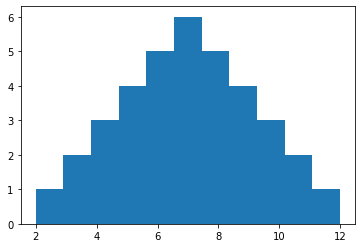

In [21]:
array = [2,3,3,4,4,4,5,5,5,5,6,6,6,6,6,7,7,7,7,7,7,8,8,8,8,8,9,9,9,9,10,10,10,11,11,12]
p_sum2 = 1
p_sum3 = 2
p_sum4 = 3
p_sum5 = 4
p_sum6 = 5
p_sum7 = 6
p_sum8 = 5
p_sum9 = 4
p_sum10 = 3
p_sum11 = 2
p_sum12 = 1
total = 36
plt.hist(array, bins = 11)
print(f'Sum2: {p_sum2/total:.3f}, Sum3: {p_sum3/total:.3f}, Sum4: {p_sum4/total:.3f}, Sum5: {p_sum5/total:.3f}, Sum6: {p_sum6/total:.3f}, Sum7: {p_sum7/total:.3f}, Sum8: {p_sum8/total:.3f}, Sum9: {p_sum9/total:.3f}, Sum10: {p_sum10/total:.3f}, Sum11: {p_sum11/total:.3f}, Sum12: {p_sum12/total:.3f}')

The numerical way is to use the convolution operator to get the probabilities of each sum. I've created the convolution array above and now I will call all of the values from it. 

Sum2: 0.028, Sum3: 0.056, Sum4: 0.083, Sum5: 0.111, Sum6: 0.139, Sum7: 0.167, Sum8: 0.139, Sum9: 0.111, Sum10: 0.083, Sum11: 0.056, Sum12: 0.028


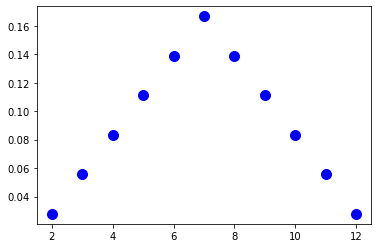

In [22]:
x = np.linspace(2,12,11)
plt.plot(x, con2, 'bo', lw = 0, ms = 10)
print(f'Sum2: {con2[0]:.3f}, Sum3: {con2[1]:.3f}, Sum4: {con2[2]:.3f}, Sum5: {con2[3]:.3f}, Sum6: {con2[4]:.3f}, Sum7: {con2[5]:.3f}, Sum8: {con2[6]:.3f}, Sum9: {con2[7]:.3f}, Sum10: {con2[8]:.3f}, Sum11: {con2[9]:.3f}, Sum12: {con2[10]:.3f}')

## 3)
Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

In [23]:
array = [2,3,3,4,4,4,5,5,5,5,6,6,6,6,6,7,7,7,7,7,7,8,8,8,8,8,9,9,9,9,10,10,10,11,11,12]
for i in range(len(array)):
    array[i] = array[i] - 7
    array[i] = array[i]**2
print(array)
stats.mean(array)

[25, 16, 16, 9, 9, 9, 4, 4, 4, 4, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 4, 4, 4, 4, 9, 9, 9, 16, 16, 25]


5.833333333333333

In [24]:
array = [2,3,3,4,4,4,5,5,5,5,6,6,6,6,6,7,7,7,7,7,7,8,8,8,8,8,9,9,9,9,10,10,10,11,11,12]
print(f'mean: {stats.mean(array)} || variance:{(stats.pvariance(array)):.3f} ')

mean: 7 || variance:5.833 


This makes sense as the distribution is symmetric around the value 7 and variance is calculated by  $\operatorname {Var} (X)=\operatorname {E} \left[(X-\mu )^{2}\right] $ I checked the variance using two different methods and came to the same conclusion. 
Variance is written as $\sigma^{2}$ which provides a $\sigma$ value of 2.415

## 4) 
Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.

I have plotted the distributions for both sums and averages of even numbers of dice rolls up to 10. Here it shows how with more rolls (more convolutions) the distribution of the average become narrower and narrower, centered at 3.5. It is hard to say whether the distribution is Gaussian at 10 rolls, because by eye the distribution appears Gaussian, but the Central Limit Theorem states that as the number of rolls reaches $ \infty $ then the distribution of the mean will become more and more Gaussian. It is possible to see that at higher numbers of convolutions, the sum values grow and the distribution becomes wider while the average does not change but the distribution become much narrower. 

Text(0, 0.5, 'Probability')

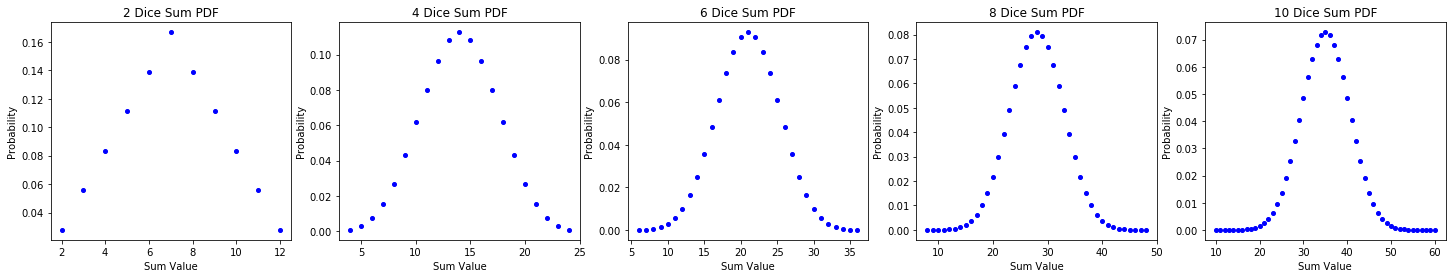

In [25]:
array = [1/6,1/6,1/6,1/6,1/6,1/6]
con = [1/6,1/6,1/6,1/6,1/6,1/6]
fig, (ax1, ax2, ax3, ax4, ax5, ) = plt.subplots(1, 5, figsize = (25, 4))
n = 2
for i in range(1,n):
    con = np.convolve(con, array)
x = np.linspace(n,n*6,n*5+1)
ax1.plot(x, con, 'bo', lw = 0, ms = 4)
ax1.set_title(f'{n} Dice Sum PDF')
n = 4
con = [1/6,1/6,1/6,1/6,1/6,1/6]
for i in range(1,n):
    con = np.convolve(con, array)
x = np.linspace(n,n*6,n*5+1)
ax2.plot(x, con, 'bo', lw = 0, ms = 4)
ax2.set_title(f'{n} Dice Sum PDF')
n = 6
con = [1/6,1/6,1/6,1/6,1/6,1/6]
for i in range(1,n):
    con = np.convolve(con, array)
x = np.linspace(n,n*6,n*5+1)
ax3.plot(x, con, 'bo', lw = 0, ms = 4)
ax3.set_title(f'{n} Dice Sum PDF')
n = 8
con = [1/6,1/6,1/6,1/6,1/6,1/6]
for i in range(1,n):
    con = np.convolve(con, array)
x = np.linspace(n,n*6,n*5+1)
ax4.plot(x, con, 'bo', lw = 0, ms = 4)
ax4.set_title(f'{n} Dice Sum PDF')
n = 10
con = [1/6,1/6,1/6,1/6,1/6,1/6]
for i in range(1,n):
    con = np.convolve(con, array)
x = np.linspace(n,n*6,n*5+1)
ax5.plot(x, con, 'bo', lw = 0, ms = 4)
ax5.set_title(f'{n} Dice Sum PDF')

ax1.set_xlabel('Sum Value'); ax1.set_ylabel('Probability')
ax2.set_xlabel('Sum Value'); ax2.set_ylabel('Probability')
ax3.set_xlabel('Sum Value'); ax3.set_ylabel('Probability')
ax4.set_xlabel('Sum Value'); ax4.set_ylabel('Probability')
ax5.set_xlabel('Sum Value'); ax5.set_ylabel('Probability')

Text(0, 0.5, 'Probability')

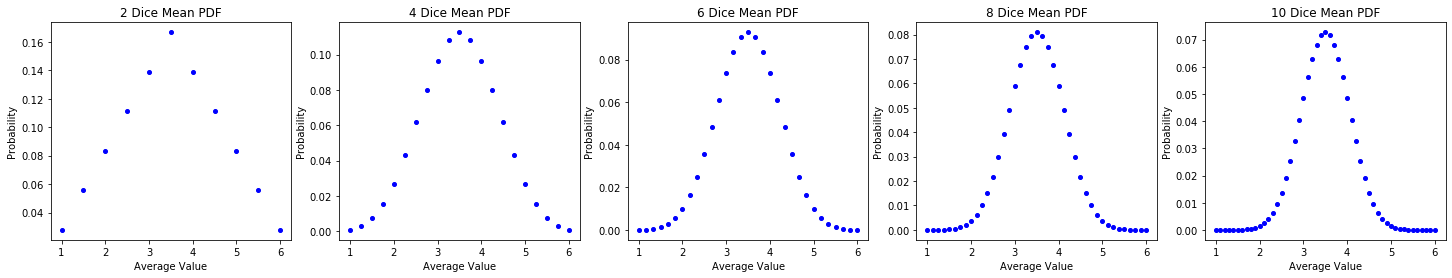

In [26]:
array = [1/6,1/6,1/6,1/6,1/6,1/6]
con = [1/6,1/6,1/6,1/6,1/6,1/6]
fig, (ax1, ax2, ax3, ax4, ax5, ) = plt.subplots(1, 5, figsize = (25, 4))
n = 2
for i in range(1,n):
    con = np.convolve(con, array)
x = np.linspace(n,n*6,n*5+1)/(n)
ax1.plot(x, con, 'bo', lw = 0, ms = 4)
ax1.set_title(f'{n} Dice Mean PDF')
n = 4
con = [1/6,1/6,1/6,1/6,1/6,1/6]
for i in range(1,n):
    con = np.convolve(con, array)
x = np.linspace(n,n*6,n*5+1)/(n)
ax2.plot(x, con, 'bo', lw = 0, ms = 4)
ax2.set_title(f'{n} Dice Mean PDF')
n = 6
con = [1/6,1/6,1/6,1/6,1/6,1/6]
for i in range(1,n):
    con = np.convolve(con, array)
x = np.linspace(n,n*6,n*5+1)/(n)
ax3.plot(x, con, 'bo', lw = 0, ms = 4)
ax3.set_title(f'{n} Dice Mean PDF')
n = 8
con = [1/6,1/6,1/6,1/6,1/6,1/6]
for i in range(1,n):
    con = np.convolve(con, array)
x = np.linspace(n,n*6,n*5+1)/(n)
ax4.plot(x, con, 'bo', lw = 0, ms = 4)
ax4.set_title(f'{n} Dice Mean PDF')
n = 10
con = [1/6,1/6,1/6,1/6,1/6,1/6]
for i in range(1,n):
    con = np.convolve(con, array)
x = np.linspace(n,n*6,n*5+1)/(n)
ax5.plot(x, con, 'bo', lw = 0, ms = 4)
ax5.set_title(f'{n} Dice Mean PDF')

ax1.set_xlabel('Average Value'); ax1.set_ylabel('Probability')
ax2.set_xlabel('Average Value'); ax2.set_ylabel('Probability')
ax3.set_xlabel('Average Value'); ax3.set_ylabel('Probability')
ax4.set_xlabel('Average Value'); ax4.set_ylabel('Probability')
ax5.set_xlabel('Average Value'); ax5.set_ylabel('Probability')

## 5)
Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Gaussian change? This is a hugely important result. Explore what this means for integrating a signal over time.

As seen in class, as the convolution operator is used more and more, the sum and average of the resultant gaussian change slowly with more iterations. The sum Gaussian becomes wider with a growing sigma at the rate of the square root of the original sigma, $ \sqrt{\sigma} $, and the average decreases by the same rate $ \frac{1}{\sqrt{\sigma}} $

(-10, 10)

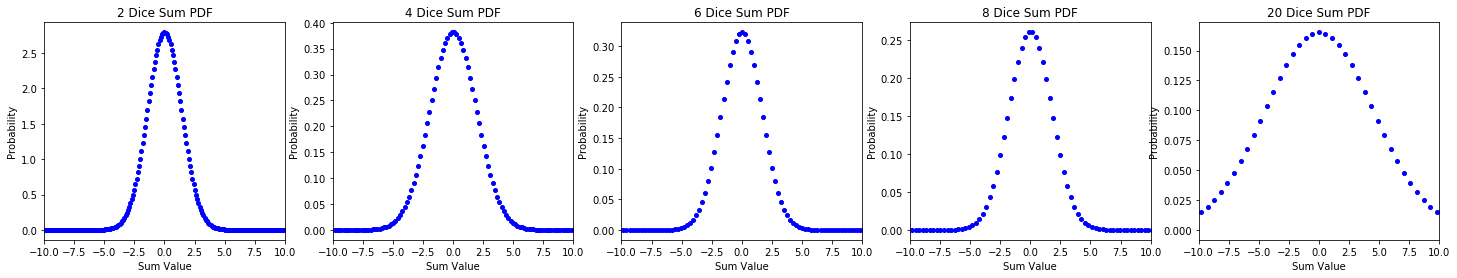

In [27]:
x = np.linspace(-5,5, 100)
y = stat.norm.pdf(x)
con = stat.norm.pdf(x)
fig, (ax1, ax2, ax3, ax4, ax5, ) = plt.subplots(1, 5, figsize = (25, 4))
n = 2
for i in range(1,n):
    con = np.convolve(con, y)
x = np.linspace(-5*n,5*n, 199)
ax1.plot(x, con, 'bo', lw = 0, ms = 4)
ax1.set_title(f'{n} Dice Sum PDF')
n = 4
con = stat.norm.pdf(x)
for i in range(1,n):
    con = np.convolve(con, array)
x = np.linspace(-5*n,5*n, 214)
ax2.plot(x, con, 'bo', lw = 0, ms = 4)
ax2.set_title(f'{n} Dice Sum PDF')
n = 6
con = stat.norm.pdf(x)
for i in range(1,n):
    con = np.convolve(con, array)
x = np.linspace(-5*n,5*n, 239)
ax3.plot(x, con, 'bo', lw = 0, ms = 4)
ax3.set_title(f'{n} Dice Sum PDF')
n = 8
con = stat.norm.pdf(x)
for i in range(1,n):
    con = np.convolve(con, array)
x = np.linspace(-5*n,5*n, 274)
ax4.plot(x, con, 'bo', lw = 0, ms = 4)
ax4.set_title(f'{n} Dice Sum PDF')
n = 20
con = stat.norm.pdf(x)
for i in range(1,n):
    con = np.convolve(con, array)
x = np.linspace(-5*n,5*n, 369)
ax5.plot(x, con, 'bo', lw = 0, ms = 4)
ax5.set_title(f'{n} Dice Sum PDF')

ax1.set_xlabel('Sum Value'); ax1.set_ylabel('Probability'); ax1.set_xlim(-10, 10)
ax2.set_xlabel('Sum Value'); ax2.set_ylabel('Probability'); ax2.set_xlim(-10, 10)
ax3.set_xlabel('Sum Value'); ax3.set_ylabel('Probability'); ax3.set_xlim(-10, 10)
ax4.set_xlabel('Sum Value'); ax4.set_ylabel('Probability'); ax4.set_xlim(-10, 10)
ax5.set_xlabel('Sum Value'); ax5.set_ylabel('Probability'); ax5.set_xlim(-10, 10)

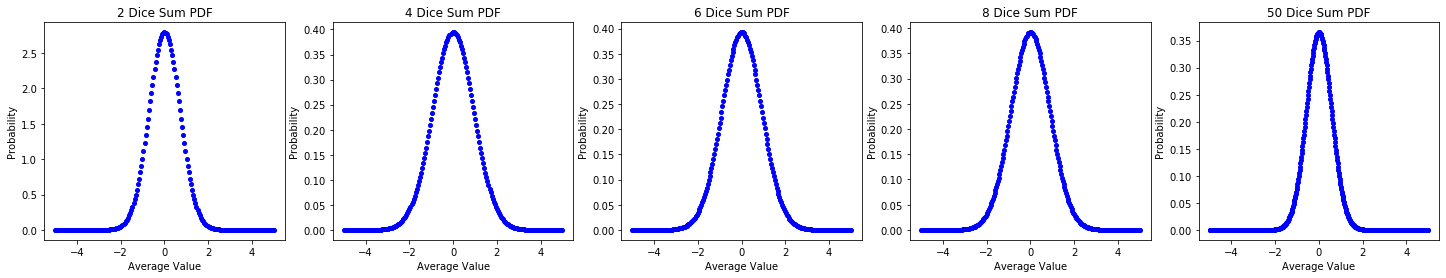

In [28]:
x = np.linspace(-5,5, 100)
y = stat.norm.pdf(x)
con = stat.norm.pdf(x)
fig, (ax1, ax2, ax3, ax4, ax5, ) = plt.subplots(1, 5, figsize = (25, 4))
n = 2
for i in range(1,n):
    con = np.convolve(con, y)
x = np.linspace(-5*n,5*n, 199)/n
ax1.plot(x, con, 'bo', lw = 0, ms = 4)
ax1.set_title(f'{n} Dice Sum PDF')
n = 4
con = stat.norm.pdf(x)
for i in range(1,n):
    con = np.convolve(con, array)
x = np.linspace(-5*n,5*n, 214)/n
ax2.plot(x, con, 'bo', lw = 0, ms = 4)
ax2.set_title(f'{n} Dice Sum PDF')
n = 6
con = stat.norm.pdf(x)
for i in range(1,n):
    con = np.convolve(con, array)
x = np.linspace(-5*n,5*n, 239)/n
ax3.plot(x, con, 'bo', lw = 0, ms = 4)
ax3.set_title(f'{n} Dice Sum PDF')
n = 8
con = stat.norm.pdf(x)
for i in range(1,n):
    con = np.convolve(con, array)
x = np.linspace(-5*n,5*n, 274)/n
ax4.plot(x, con, 'bo', lw = 0, ms = 4)
ax4.set_title(f'{n} Dice Sum PDF')
n = 50
con = stat.norm.pdf(x)
for i in range(1,n):
    con = np.convolve(con, array)
x = np.linspace(-5*n,5*n, 519)/n
ax5.plot(x, con, 'bo', lw = 0, ms = 4)
ax5.set_title(f'{n} Dice Sum PDF')

ax1.set_xlabel('Average Value'); ax1.set_ylabel('Probability');# ax1.set_yscale('log')
ax2.set_xlabel('Average Value'); ax2.set_ylabel('Probability');# ax2.set_yscale('log')
ax3.set_xlabel('Average Value'); ax3.set_ylabel('Probability');# ax3.set_yscale('log')
ax4.set_xlabel('Average Value'); ax4.set_ylabel('Probability');# ax4.set_yscale('log')
ax5.set_xlabel('Average Value'); ax5.set_ylabel('Probability');# ax5.set_yscale('log')

In [30]:
print( 'Now adding this code so I can create a pull request.' )

Now adding this code so I can create a pull request.
